# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:
- No correlation between the cities latitude to wind speed, cloudiness, or humidity
- High correlation between cities latitude and max temperature.
- The closer you get to the equator the higher the max temperature is.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("output_data/cities.csv")

#url
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imerial&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = 'imperial'

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")



City not found. Skipping...
Processing Record 1 of Set 1 | belyy yar
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | xining
Processing Record 11 of Set 1 | athabasca
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | juneau
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | kirakira
Processing Record 16 of Set 1 | arenillas
Processing Record 17 of Set 1 | komsomolskiy
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | christchurch
Processing Record 23 of Set 1 | mumford
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({'City': city_two,
                          'Cloudiness':cloudinesses,
                          'Country':countries,
                          'Date':dates,
                          'Humidity':humidities,
                          'Lat':lats,
                          'Lng':lngs,
                          'Max Temperature':max_temps,
                          'Wind Speed':wind_speeds})

weather_df.count()

City               558
Cloudiness         558
Country            558
Date               558
Humidity           558
Lat                558
Lng                558
Max Temperature    558
Wind Speed         558
dtype: int64

In [13]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,belyy yar,86,RU,1579022360,94,55.84,32.94,272.07,2.97
1,dikson,97,RU,1579022361,99,73.51,80.55,249.47,4.89
2,rikitea,0,PF,1579022256,79,-23.12,-134.97,298.79,5.12
3,tuktoyaktuk,5,CA,1579022361,68,69.45,-133.04,247.15,3.10
4,jamestown,90,US,1579022210,86,42.10,-79.24,283.71,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [33]:
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title(f"City Latitude vs. {ylabelname} ({time.strftime('%m/%d/%y')})")
    plt.grid(True)


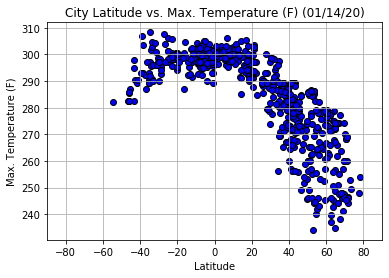

In [34]:
plt.scatter(x=weather_df["Lat"],y=weather_df["Max Temperature"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Max. Temperature (F)",[-90,90])
plt.show()

#### Latitude vs. Humidity Plot

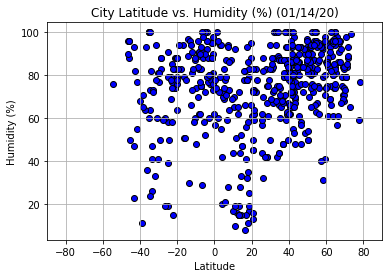

In [35]:
plt.scatter(x=weather_df["Lat"],y=weather_df["Humidity"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Humidity (%)",[-90,90])
plt.show()

#### Latitude vs. Cloudiness Plot

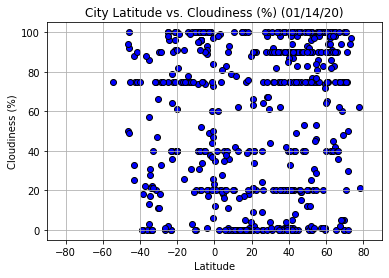

In [36]:
plt.scatter(x=weather_df["Lat"],y=weather_df["Cloudiness"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Cloudiness (%)",[-90,90])
plt.show()

#### Latitude vs. Wind Speed Plot

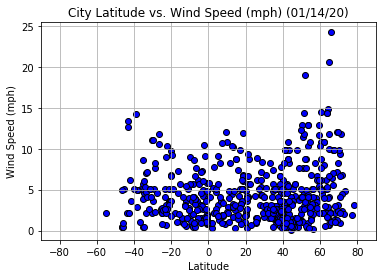

In [37]:
plt.scatter(x=weather_df["Lat"],y=weather_df["Wind Speed"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Wind Speed (mph)",[-90,90])
plt.show()